# 【問題1】データの可視化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, ROUND_HALF_UP

%matplotlib inline

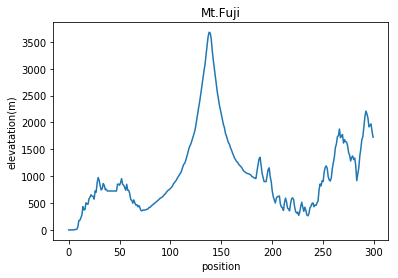

In [2]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

arr_position = fuji[:,0] # その地点の番号の配列
arr_elevatation = fuji[:,3] #  標高の配列

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevatation(m)")
plt.plot(arr_position, arr_elevatation)
plt.show()

# 【問題2】ある地点の勾配を計算する関数を作成

In [44]:
def calc_gradient(arr_position, arr_elevatation, position):
    delta_position = arr_position[1:] - arr_position[:-1]
    delta_elevatation = arr_elevatation[1:] - arr_elevatation[:-1]
    arr_gradient = delta_elevatation/delta_position
    return arr_gradient[position]

arr_position = fuji[:,0] # その地点の番号の配列
arr_elevatation = fuji[:,3] #  標高の配列
position = 136 # ある地点の番号
print("ある地点の勾配：{}".format(calc_gradient(arr_position, arr_elevatation, position)))

ある地点の勾配：165.48999999999978


# 【問題3】移動先の地点を計算する関数を作成

In [45]:
def calc_destination(arr_position, arr_elevatation, position):
    
    try:
        alpha = 0.2
        destination = position - alpha*calc_gradient(arr_position, arr_elevatation, position) # 移動先の地点 = 今いる地点 - α × 今いる地点の勾配
        destination = Decimal(destination).quantize(Decimal("0"), rounding = ROUND_HALF_UP) # 四捨五入
        destination = int(destination)
        return destination
    
    except:    
        return


arr_position = fuji[:,0] # その地点の番号の配列
arr_elevatation = fuji[:,3] #  標高の配列
position = 136 # ある地点の番号
destination = calc_destination(arr_position, arr_elevatation, position)
print("移動先の地点：{}".format(destination))    

移動先の地点：103


# 【問題4】山を下る関数を作成

In [88]:
def calc_min_destination(arr_position, arr_elevatation, position):
    arr_destination = [position]
    for _ in range(100):
        position = calc_destination(arr_position, arr_elevatation, position)
        if position is None:
            break
        elif position == arr_destination[-1]:
            break
        elif position < 0 or position > 299:
            break            
        else:
            arr_destination.append(position)
    return np.array(arr_destination)
        
arr_position = fuji[:,0] # その地点の番号の配列
arr_elevatation = fuji[:,3] #  標高の配列
position = 136 # ある地点の番号
destination = calc_min_destination(arr_position, arr_elevatation, position)
print(destination)

[136 103  98  95  89  86  83  80  76  74]


# 【問題5】下山過程の可視化

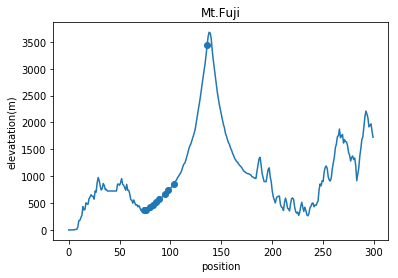

In [52]:
arr_position = fuji[:,0] # その地点の番号の配列
arr_elevatation = fuji[:,3] #  標高の配列
position = 136 # ある地点の番号
destination = calc_min_destination(arr_position, arr_elevatation, position)
target_elevatation = fuji[destination, 3]

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevatation(m)")
plt.plot(arr_position, arr_elevatation)
plt.scatter(destination, target_elevatation)
plt.show()

# 【問題6】初期値の変更

In [77]:
arr_position = fuji[:,0] # その地点の番号の配列
arr_elevatation = fuji[:,3] #  標高の配列

arr_destination = []
for pos in range(0,298):
    destination = calc_min_destination(arr_position, arr_elevatation, pos)
    if destination is None:
        pass
    else:
        arr_destination.append(np.array(destination))
        
arr_destination = np.array(arr_destination)
#print(arr_destination)

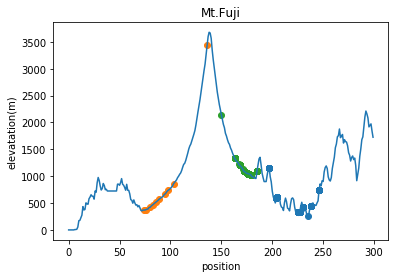

In [86]:
# ある地点の番号が「２３５」の場合
destination_1 = arr_destination[235]
target_elevatation_1 = fuji[destination_1, 3]

# ある地点の番号が「136」の場合
destination_2 = arr_destination[136]
target_elevatation_2 = fuji[destination_2, 3]

# ある地点の番号が「150」の場合
destination_3 = arr_destination[150]
target_elevatation_3 = fuji[destination_3, 3]

plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevatation(m)")
plt.plot(arr_position, arr_elevatation)
plt.scatter(destination_1, target_elevatation_1)
plt.scatter(destination_2, target_elevatation_2)
plt.scatter(destination_3, target_elevatation_3)
plt.show()